## Linear Support Vector Regression

In [2]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.svm import SVR, SVC # suport vector regression / classification
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE # 2차원으로 축소, 주로 시각화에 활용(비슷한 구조끼리 데이터를 정리하여 구조 이해 도움)

In [ ]:
import warnings
warnings.

### 보스턴 주택 가격

In [4]:
x, y = load_boston(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
model = SVR(kernel='linear')
model.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

학습 데이터 점수: 0.7182471472543905
평가 데이터 점수: 0.6632705841807324


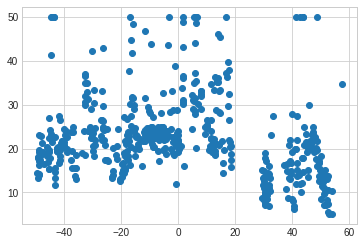

In [ ]:
x_comp = TSNE(n_components=1).fit_transform(x) # 저차원 변환
plt.scatter(x_comp, y); # 시각화

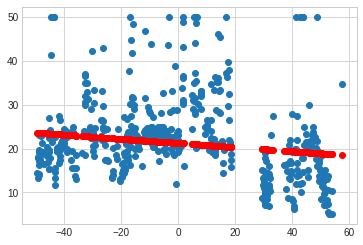

In [ ]:
model.fit(x_comp, y)
predict = model.predict(x_comp)
plt.scatter(x_comp, y)
plt.scatter(x_comp, predict, color = 'r')

In [ ]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

cross_validate(
    estimator=estimator,
    x=x, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.3s finished


{'fit_time': array([0.03326726, 0.02213526, 0.02669311, 0.02715349, 0.02855372]),
 'score_time': array([0.00241113, 0.0014143 , 0.00230169, 0.00247645, 0.00226641]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],
               'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe, param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(x, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='linear',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gam

In [ ]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

### 당뇨병

## Kernel SVR

### 보스턴 주택 가격

In [ ]:
x, y = load_boston(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = SVR(kernel='rbf')
model.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

학습 데이터 점수: 0.6957839889671082
평가 데이터 점수: 0.5625966072712547


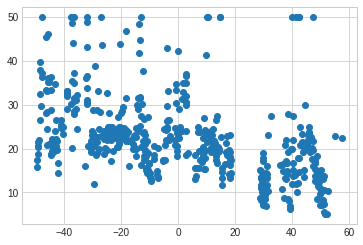

In [ ]:
x_comp = TSNE(n_components=1).fit_transform(x)
plt.scatter(x_comp, y)

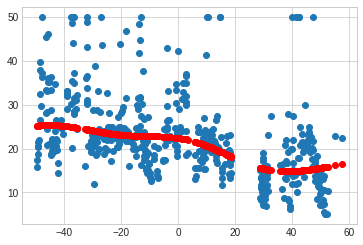

In [ ]:
model.fit(x_comp, y)
predict = model.predict(x_comp)
plt.scatter(x_comp, y)
plt.scatter(x_comp, predict, color = 'r');

In [ ]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))

cross_validate(
    estimator=estimator,
    x=x, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.02737093, 0.04157233, 0.01937795, 0.03211093, 0.01912761]),
 'score_time': array([0.00357342, 0.00364399, 0.00425601, 0.00306058, 0.00347495]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator=pipe, param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(x, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [ ]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
'model__C': [1.0, .1, .01],
'model__epsilon': [1, .1, .01]}]

gs = GridSearchCV(
    estimator=pipe, param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(x, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1, 0.1, 0.01],
                          'model__gamma': 

In [ ]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### 당뇨병

## Linear SVC

### 유방암

In [ ]:
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

학습 데이터 점수: 0.9824175824175824
평가 데이터 점수: 0.9824561403508771


In [ ]:
def make_meshgrid(x, y, h=.2):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  return xx, yy

In [ ]:
def plot_contours(clf, xx, yy, --params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, --params)

  return out

In [ ]:
x_comp = TSNE(n_components=2).fit_transform(x) # 저차원 변환
x0, x1 = x_comp[:, 0], x_comp[:, 1]
xx, yy = make_meshgrid(x0, x1)

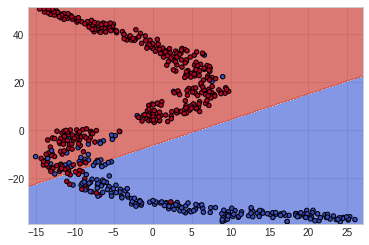

In [ ]:
model.fit(x_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [ ]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(
    estimator=estimator,
    x=x, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00864482, 0.01121259, 0.00668645, 0.00618744, 0.00621319]),
 'score_time': array([0.0027051 , 0.00099158, 0.00087452, 0.00092196, 0.00085235]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe, 
    param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(x, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=

In [ ]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### 붓꽃

## Kernel SVC

### 유방암

In [ ]:
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = SVC(kernel='rbf')
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

학습 데이터 점수: 0.9846153846153847
평가 데이터 점수: 0.9912280701754386


In [ ]:
x_comp = TSNE(n_components=2).fit_transform(x)
x0, x1 = x_comp[:, 0], x_comp[:, 1]
xx, yy = make_meshgrid(x0, x1)

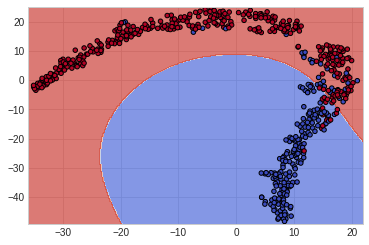

In [ ]:
model.fit(x_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [ ]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))

cross_validate(
    estimator=estimator,
    x=x, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.00752592, 0.0070262 , 0.01560569, 0.01018143, 0.00756121]),
 'score_time': array([0.0016675 , 0.00528979, 0.0018239 , 0.00907063, 0.00221181]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator=pipe, 
    param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(x, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  12 out of  15 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [ ]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### 붓꽃

In [ ]:
x, y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

# 정리

### 와인

In [ ]:
# 

In [ ]:
x, y = load_wine(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)